In [2]:
#here We're importing the required libraries for data manipulation, visualization, machine learning, and working with dates.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime


In [3]:
#Define ask_for_date Function: A function to prompt the user for a date and ensure it's in the correct format.
def ask_for_date():
    while True:
        date_str = input("Please enter a date in YYYY-MM-DD format: ")
        try:
            valid_date = datetime.strptime(date_str, "%Y-%m-%d")
            print("You entered a valid date:", valid_date.date())
            return date_str
        except ValueError:
            print("This is not a valid date. Please try again.")

In [4]:
# Load the Tesla stock price data into a DataFrame.
url = "https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv"
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])
data['Days'] = (data['Date'] - data['Date'].min()).dt.days


In [5]:
# Split the data into training and test sets without shuffling.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle=False)



In [6]:
# Extract features and target variables for training and testing.
X_train = train_data['Days'].values.reshape(-1, 1)
y_train = train_data['Close'].values
X_test = test_data['Days'].values.reshape(-1, 1)
y_test = test_data['Close'].values


In [7]:
# Create and train the Linear Regression model.
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Define the function to predict the stock price for a given date string.
def predict_price(date_string):
    date_obj = datetime.strptime(date_string, '%Y-%m-%d')
    days_since_start = (date_obj - data['Date'].min()).days
    predicted_price = model.predict([[days_since_start]])
    return predicted_price[0]

In [9]:
# Ask the user for a date and predict the stock price for that date.
user_date = ask_for_date()
predicted_price = predict_price(user_date)
print(f"Predicted Stock Price for {user_date}: ${predicted_price:.2f}")

Please enter a date in YYYY-MM-DD format: 2020-09-09
You entered a valid date: 2020-09-09
Predicted Stock Price for 2020-09-09: $80.64


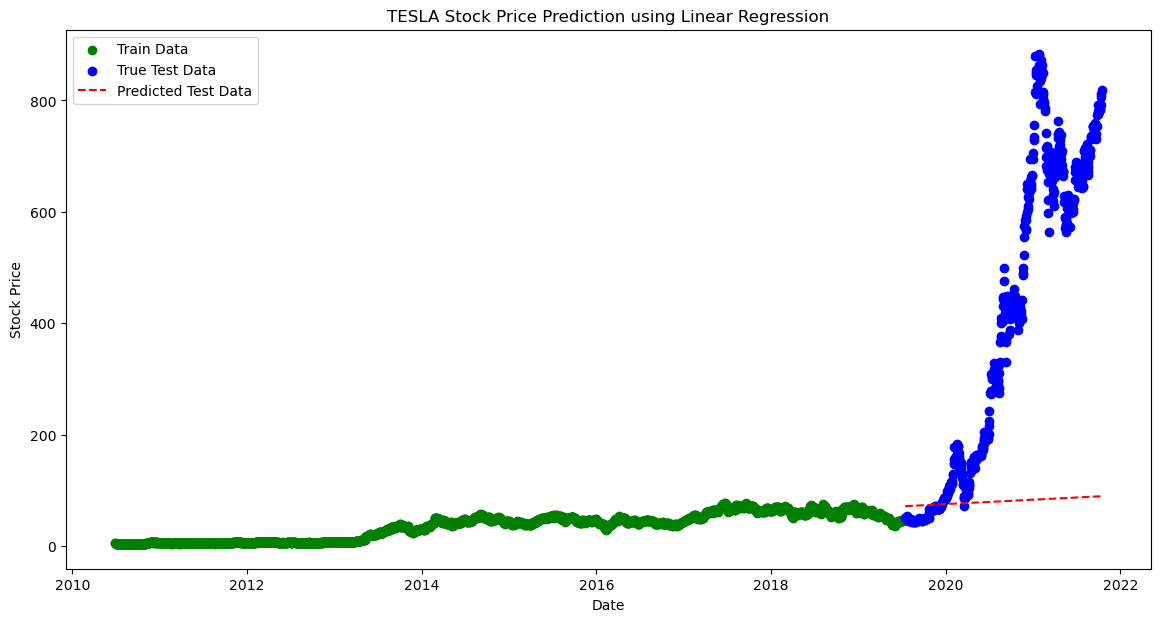

In [10]:
# Plot the results.
plt.figure(figsize=(14, 7))
plt.scatter(train_data['Date'], y_train, color='green', label='Train Data')
plt.scatter(test_data['Date'], y_test, color='blue', label='True Test Data')
plt.plot(test_data['Date'], model.predict(X_test), color='red', linestyle='--', label='Predicted Test Data')
plt.title('TESLA Stock Price Prediction using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
